<a href="https://colab.research.google.com/github/Amjimenezv94/Bootstrap/blob/master/TSwithML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos las librerias
!pip install -U pip
!pip install folium==0.2.1 urllib3 yahoo_fin requests_html 
!pip install fbprophet

In [ ]:
import yahoo_fin.stock_info as si #http://theautomatic.net/2018/01/25/coding-yahoo_fin-package/

In [ ]:
Netflix = si.get_data("nflx") # Obtenemos los datos de netflix
Apple = si.get_data("aapl") # Obtenemos los datos de netflix 
Amazon = si.get_data("amzn") # Obtenemos los datos de netflix

In [ ]:
print(Netflix.info())
print(type(Netflix)) # imprimimos el tipo de dato y notamos que los descarga como un dataframe 
Netflix.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4678 entries, 2002-05-23 to 2020-12-18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      4678 non-null   float64
 1   high      4678 non-null   float64
 2   low       4678 non-null   float64
 3   close     4678 non-null   float64
 4   adjclose  4678 non-null   float64
 5   volume    4678 non-null   int64  
 6   ticker    4678 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 292.4+ KB
None
<class 'pandas.core.frame.DataFrame'>


,open,high,low,close,adjclose,volume,ticker
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NFLX
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,NFLX
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,NFLX
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,NFLX
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,NFLX


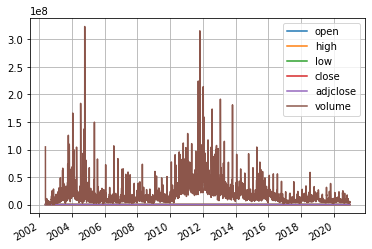

In [ ]:
# Importamos modulos de visualización y manipulación
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#importamos el modelos de prediccion
from fbprophet import Prophet
from sklearn.svm  import SVR


Netflix.plot(grid=True)
plt.show() #vemos que no podemos ver bien la grafica, porque la diferencia entre unidades de la columna "Volume" y las demas columnas es muy grande

In [ ]:
#eliminamos la columna volume
Netflix_clean = Netflix.drop('volume', axis=1)

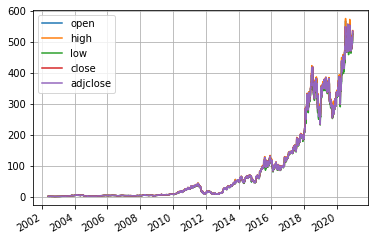

In [ ]:
Netflix_clean.plot(grid=True)
plt.show() #vemos que ahora podemos ver bien la grafica, porque la diferencia entre unidades de la columna "Volume" y las demas columnas es muy grande
#Tiene tendencia? es estacionaria? tiene periocidad?

In [ ]:
#armemos un data frome con el porcentaje de cambio de la clasura respecto a la apertura
Netflix['open_close'] = abs(Netflix.close - Netflix.open)/Netflix.open

In [ ]:
def rate_change(close, open):
  """Obtenemos la tasa de cambio de la clausura respecto a la apertura"""
  result = (close - open)/open
  return result

In [ ]:
Netflix['open_close'] = rate_change(Netflix.close, Netflix.open)
Apple['open_close'] = rate_change(Apple.close, Apple.open)
Amazon['open_close'] = rate_change(Amazon.close, Amazon.open)

In [ ]:
Tdata = {
    'Net' : Netflix.open_close,
    'Appl' : Apple.open_close,
    'Amz' : Amazon.open_close,
    }

Total_df = pd.DataFrame(Tdata)

In [ ]:
Total_df

,Net,Appl,Amz
1980-12-12,NaN,0.000000,NaN
1980-12-15,NaN,-0.004566,NaN
1980-12-16,NaN,-0.004926,NaN
1980-12-17,NaN,0.000000,NaN
1980-12-18,NaN,0.000000,NaN
...,...,...,...
2020-12-14,0.033594,-0.006688,0.004445
2020-12-15,0.002469,0.028470,-0.004995
2020-12-16,0.009075,0.003139,0.020450
2020-12-17,0.007372,-0.001552,-0.004283


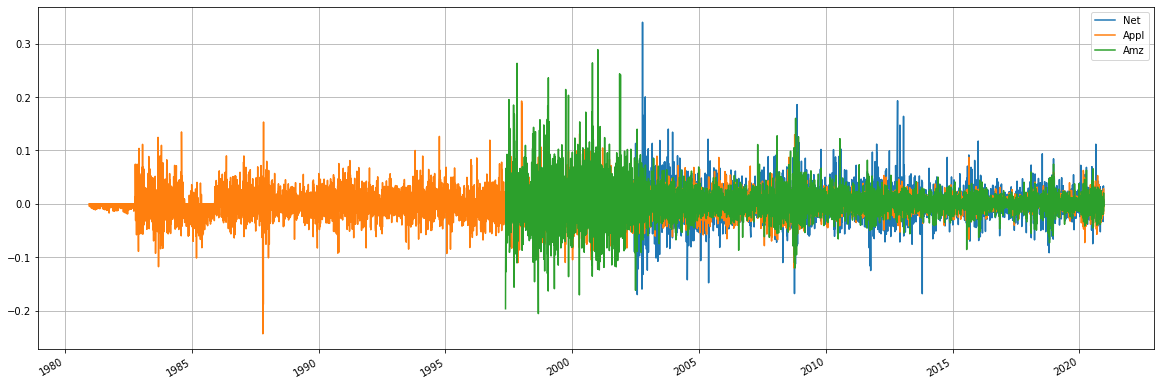

In [ ]:
Total_df.plot(grid=True, figsize=(20,7))

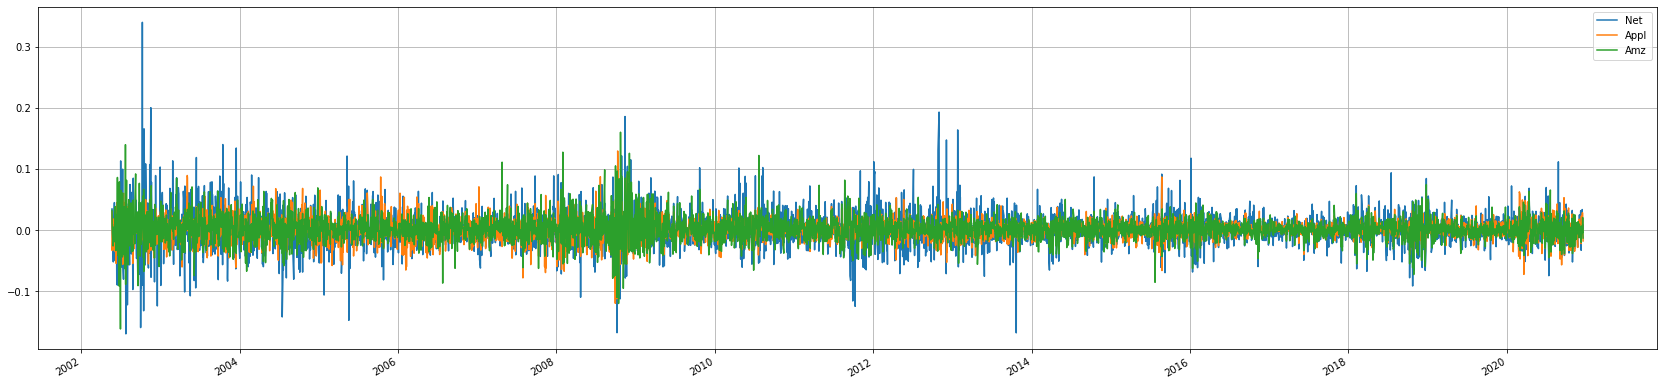

In [ ]:
Total_df = Total_df.dropna()
Total_df.plot(grid=True,figsize=(29,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d622c9358>,
      dtype=object)

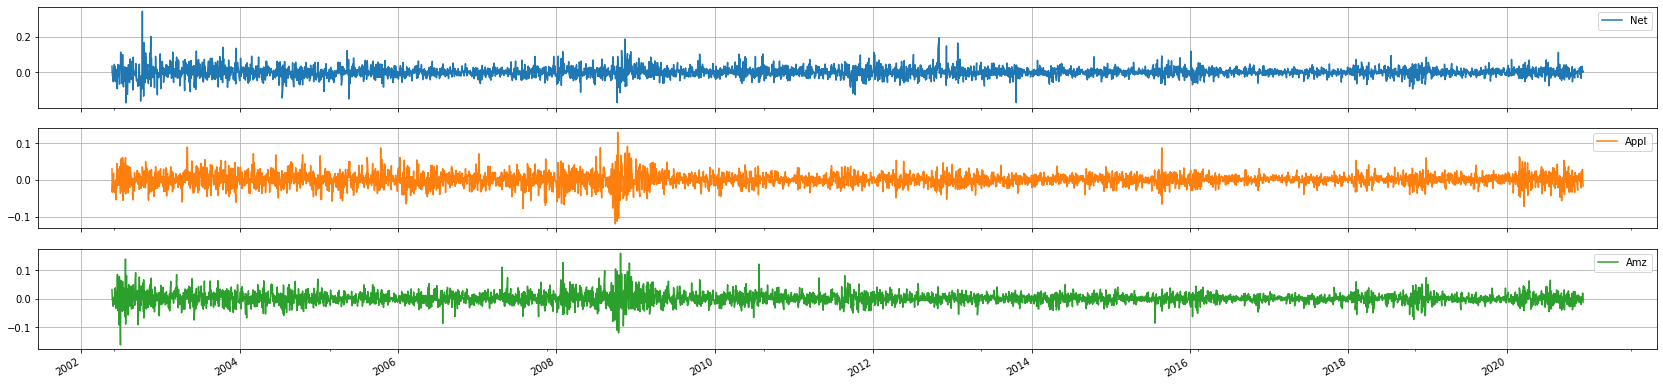

In [ ]:
Total_df.plot(subplots=True,grid=True,figsize=(29,7))# Es estacionaria? cumple con las tres reglas? como es su varianza, centrada, tendencia?

In [ ]:
Total_net = (len(Total_df.Net[Total_df.Net>=0])/Total_df.shape[0])*100
Total_appl = (len(Total_df.Appl[Total_df.Appl>=0])/Total_df.shape[0])*100
Total_amz = (len(Total_df.Amz[Total_df.Amz>=0])/Total_df.shape[0])*100

In [ ]:
print('Netflix creció {} %, Amazon creció {} % y Apple creció {} %'.format(Total_net, Total_amz, Total_appl)) # Estarán correlacionadas estás series?

Netflix creció 49.3373236425823 %, Amazon creció 51.710132535271484 % y Apple creció 51.60324925181702 %


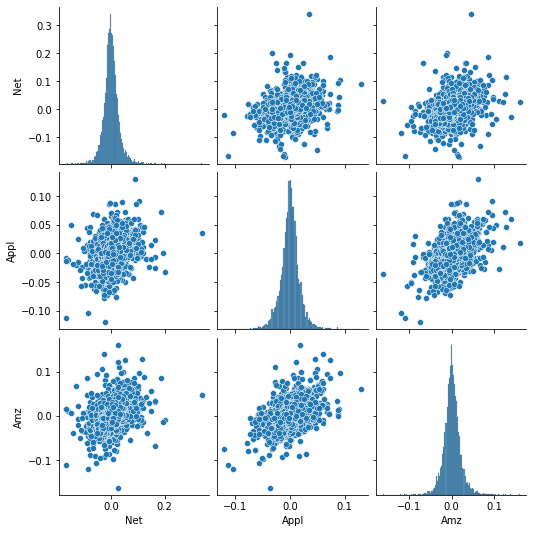

In [ ]:
import seaborn as sns #libreria muy buena para visualizar sobre dataframes

sns.pairplot(data=Total_df)

In [ ]:
# Compute correlation using corr()
Total_df.corr()#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

,Net,Appl,Amz
Net,1.000000,0.308469,0.371419
Appl,0.308469,1.000000,0.473075
Amz,0.371419,0.473075,1.000000


In [ ]:
# Sin embargo está no es la manera más eficiente de observar una correlacion entre dos o más series series.
# Miremos como se correlaciona la serie consigo misma

# hagamos un remuestro a datos mensuales
Total_df_monthly = Total_df.resample(rule= 'W').mean()

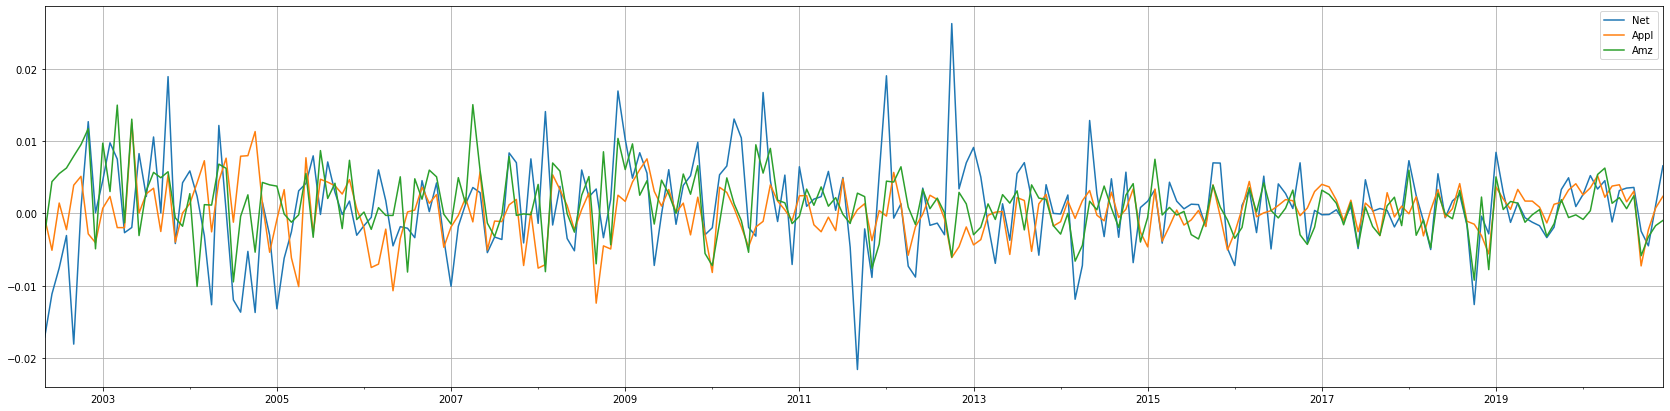

In [ ]:
Total_df_monthly = Total_df.resample('M').mean()
Total_df_monthly.plot(grid=True,figsize=(29,7))

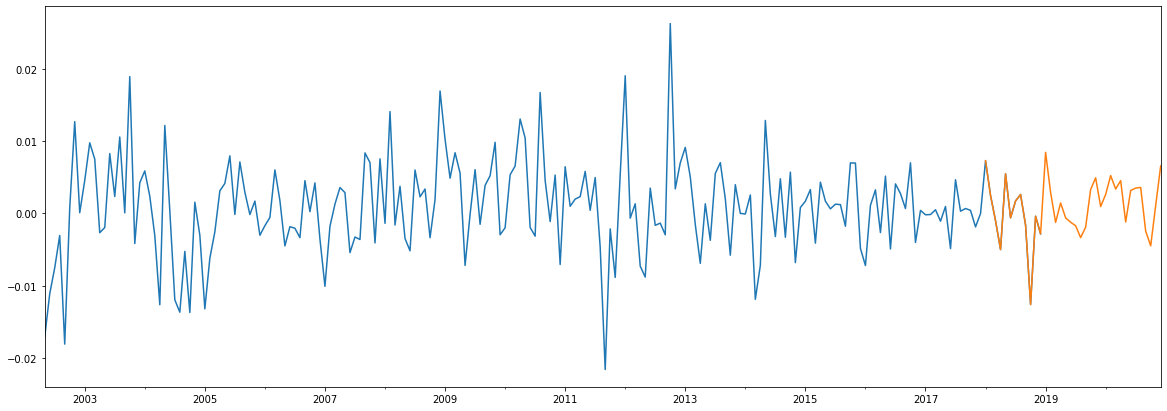

In [ ]:
#Entrenamiento y prueba
Train = Total_df_monthly[:'2018']
Test = Total_df_monthly['2018':]

# Creamos una figura
fig, ax = plt.subplots(figsize=(20,7))

# Dibujamos el entrenamiento y los datos de prueba
Train.Net.plot(ax=ax)
Test.Net.plot(ax=ax)
plt.show()

In [ ]:
test.shape[0]

NameError: ignored

In [ ]:
#ad fuller
# Importamos augmented dicky-fuller
from statsmodels.tsa.stattools import adfuller

# Run test
# Run test
resultNet = adfuller(Total_df_monthly['Net'])
# Run test
resultAppl = adfuller(Total_df_monthly['Appl'])
# Run test
resultAmz = adfuller(Total_df_monthly['Amz'])

In [ ]:
#Es un series estacionaria?.
print('El p-value y los puntos criticos para Net, son : {} pvalue. {} valores criticos'.format(resultNet[1], resultNet[4]))
print('El p-value y los puntos criticos para Net, son : {} pvalue. {} valores criticos'.format(resultAppl[1], resultAppl[4]))
print('El p-value y los puntos criticos para Net, son : {} pvalue. {} valores criticos'.format(resultAmz[1], resultAmz[4]))

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# calculamos la autocorrelación
acf_array = acf(Total_df_monthly['Net'])
print(acf_array)

# Plot the acf function
plot_acf(Total_df_monthly['Net'], alpha=0.05)
plt.show()

In [ ]:
# calculamos la autocorrelación parcial
acf_array = pacf(Total_df_monthly['Net'])
plt.plot(acf_array)
plt.hlines(0, 0, 40, linestyles='--', color ='red')

In [ ]:
# Plot the acf function
plot_pacf(Total_df_monthly['Net'], alpha=0.05, lags=10)
plt.show()# Tenemos un AR(1)

In [ ]:
#Establecemos un modelos ARMA
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(Train['Net'], order=(1,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

In [ ]:
# Fit an AR(1) model to the first simulated data
mod = ARMA(Total_df_monthly['Net'], order=(2,2))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

In [ ]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(Train['Net'], order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [ ]:
res.plot_predict(start='2018', end='2020')

# EJERCICIO


In [ ]:
# Leemos los datos
data = pd.read_csv('https://raw.githubusercontent.com/LuisFDuarte/Data_files/main/B12_DERE.csv',error_bad_lines=False, index_col=0)
data.head()

In [ ]:
# creamos una función para parsear la fechas, limpiar los datos y cambiar la frecuencia de los datos
def clean_data(data, frecuency):
  #Se ajusta la columna de tiempo como tipo datetime
  data['time']=pd.to_datetime(data['timestamp.1'],format='%d/%m/%Y %H:%M:%S')
  data.set_index(data['time'], inplace=True)
  #Se promedian los datos dentro de cada rango temporal .      
  data = data.resample(frecuency).mean() 
  data['ActivePower'] = data['SM_B12_DERE: ActivePower']
  return pd.DataFrame(data['ActivePower'])

In [ ]:
# obtenemos el día de la semana correspondiente a cada fecha
demanda_promedio_D = dataActive.copy()
demanda_promedio_D['fecha'] = pd.to_datetime(dataActive.index, dayfirst=True)
demanda_promedio_D['dia'] = demanda_promedio_D.fecha.dt.day_name()

In [ ]:
sns.catplot( x='dia', y="ActivePower",data= demanda_promedio_D,  kind="box")# que concluciones podemos sacar de este grafico. Estamos sacando la distribución de los datos por día

In [ ]:
sns.histplot( x="ActivePower", data=demanda_promedio_D, kde=True)

In [ ]:
tabla =demanda_promedio_D.groupby('dia').agg(['max', 'min', 'mean', 'median'])
tabla

In [ ]:
dataActive= clean_data(data, 'D')
#Eliminamos los datos errados
dataActive = dataActive.dropna()
#graficamos los datos
dataActive.plot(grid=True,figsize=(29,7))

En la grafica se puede apreciar una fuerte redución la potencia consumida aproximadamente entre el segundo semestre del año 2019 y el primer semetre del año 2020

In [ ]:
#aplicamos una transformacion de los datos con el objectivo de volver la serie estacionaria
def log_return(data):
  data = np.log(data.ActivePower.div(data.ActivePower.shift(-1)))
  data = pd.DataFrame(data)
  data.columns = ['ActivePowerLog']
  return data

In [ ]:
scaled_data = log_return(dataActive)
#Eliminamos los datos errados
scaled_data = scaled_data.dropna()
#graficamos los datos
scaled_data.plot(grid=True,figsize=(29,7))

In [ ]:
#hacemos una función para invertir la transformación logaritmica y devolvernos a las escalas reales
def inv_scaled(data, valor_inicial):
  data = np.exp(data)*valor_inicial
  return data


In [ ]:
# testeamos si la serie es estacionaria
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [ ]:
test_stationarity(scaled_data, 'ActivePowerLog')

El test nos muestra que la serie tiene una media constante centrada en cero, el pvalue esta por debajo del valor critico (0.05), y la varianza parece ser constante la mayor parte del tiempo. Por ende, decimos que la series es estacionaria al rechazar la hipotesis nula. 

In [ ]:
#se suaviza la series para eliminar cambios bruscos y eliminar ruido
scaled_data = scaled_data.rolling(window = 4, min_periods=1,center = False).mean()

In [ ]:
scaled_data

In [ ]:
# buscamos los lags que más definen los datos para establecer un modelo autoregresivo
# para ellos aplicamos la autocorrelación
acf_array = acf(scaled_data.values)
lags = pd.DataFrame(acf_array)
lags.columns = ['autocorrelacion']
lags[lags.values>0.5]



In [ ]:
 lags[ lags.values<-0.5 ]

vemos que la series se relaciona asimisma fuertemente en los lags 3,4,7,11, 14 y 21 

In [ ]:
# Plot the acf function
plot_acf(scaled_data.values, alpha=1)
plt.show()

La series parece tener reversión a la media. Escogeremos los lags 4 y 7 que caen dentro del primer ciclo de los valores de la autcorrelación

In [ ]:
# definimos una función para volver la serie una conjunto de datos para modelos supervisados
def supervised_data(data, lags):
  result = pd.DataFrame()
  result['y_true'] = data['ActivePowerLog']
  #ventana de tiempo que se desea predecir
  for lag in lags:
      result['lag_{}'.format(lag)] = data.shift(-lag)
  return result

In [ ]:
#se configuran los datos para predecir a 1 día debido a que los datos fueron remuestreados a una frecuencia diaria
data_supervised = supervised_data(scaled_data, [4,7])
data_supervised.dropna(inplace=True)

In [ ]:
data_supervised

In [ ]:
#dividimos los datos en entrenamiento y prueba
def split_series(data, pct_test):
  """Divide los datos en entrenamiento y prueba.
  pct_test: porcentaje de los datos seleccionados para probar el rendimiento del modelo. Numero entre 0 y 100. Menor a 50 y mayor que 0"""
  train = data.iloc[:int((pct_test/100)*len(data))]
  test = data[int((pct_test/100)*len(data)):]
  return train, test 

In [ ]:
train, test = split_series(data_supervised, 30)

In [ ]:
print('tamaño del dataset de prueba',len(test))
print('tamaño del dataset de entrenamiento', len(train))
print('tamaño total del dataset', len(scaled_data))

In [ ]:
#Ajustamos las dimensiones para el SVM
train_data = train.drop('y_true', axis=1).values.reshape(-1,2)
y_train = train['y_true'].values
test_data = test.drop('y_true', axis=1).values.reshape(-1,2)
y_test =test['y_true'].values

In [ ]:
#configuramos una semilla aleatoria para asegurar replicabilidad de los resultados
np.random.seed(1234)
np.random.RandomState(123)
#Aplicamos un SVR
#Support vector  regression
SMR = SVR(C=10, kernel='linear')
SMR.fit(train_svm,y_train)

In [ ]:
#obtenemos las prediciones
y_predict = SMR.predict(test_svm)

In [ ]:
# definimos las metricas de error
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return


In [ ]:
print_error_metrics(y_test,y_predict)

In [ ]:
def plot_forecast(y_test,y_predict):
  Forecast = pd.DataFrame({
      'real':y_test,
      'estimado': y_predict}, index=test.index)
  Forecast.plot()

In [ ]:
plot_forecast(y_test,y_predict)

In [ ]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=1.0)
KRR.fit(train_data,y_train)
y_predict = KRR.predict(test_data)

In [ ]:
print_error_metrics(y_test,y_predict)
plot_forecast(y_test,y_predict)